### Sentiment Analysis

In [ ]:
import nltk
nltk.download('wordnet')
import pandas as pd
import re 
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import RFE 
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
#!pip install textblob 

In [3]:
from textblob import TextBlob

In [5]:
"""
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df.rename(columns = {'Filename':'Text'})
df=df.drop_duplicates()
Themes=df.sort_values('Text').reset_index(drop=True)
df=df.drop(columns=df.columns[1:],axis=1)
"""

In [6]:
"""
df['Text']= df['Text'].astype(str) #Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
df['polarity'] = df['Text'].apply(pol) # depending on the size of your data, this step may take some time.
"""

In [4]:
df= pd.read_excel('D:\\Class work\\2nd Year\\4th Sem\\Capstone\\Segmentation\\Actual_analysis\\Review Analysis\\Combined_metrics_Reviews.xlsx')

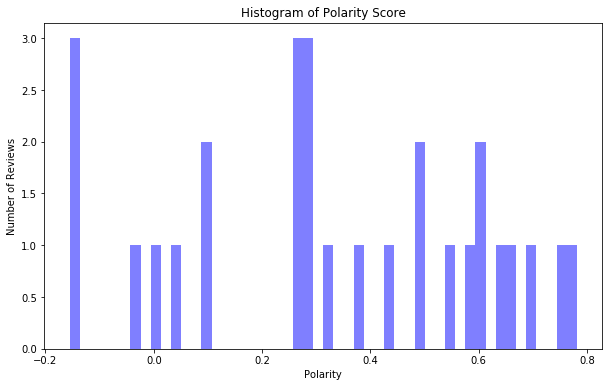

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [ ]:
#df['Sentiment'] = df['Polarity'].apply(lambda x:1 if x>0 else (0 if x==0 else -1)  )

In [ ]:
#df.head()

In [6]:
#df= pd.read_excel('D:\\Class work\\2nd Year\\4th Sem\\Capstone\\Segmentation\\Actual_analysis\\Combined_metrics.xlsx')
df['Sentiment'] = df['Polarity'].apply(lambda x:1 if x>0 else (0 if x==0 else -1)  )

In [7]:
X = df.iloc[:,12:-2]
X.head()
y = df.iloc[:,-1]
#y.head()

In [8]:
X.head()

,RC1,RC2,RC3,RC4,RC5,RC6,RC10,RC9,RC7,RC8
0,1.224584,3.384495,11.214537,1.494544,3.449425,1.696473,-2.284880,2.651910,-0.982962,0.166945
1,-0.772610,-0.401240,-1.565051,-0.392241,-0.929367,-2.051842,0.133620,-0.282078,-0.108822,0.147577
2,1.116823,-0.327541,-1.956411,-0.345580,-1.182697,-0.147329,-0.072685,-0.169118,-0.301334,0.976135
3,-1.651336,17.181246,-0.592122,1.469903,-0.789921,-0.086725,-0.553850,-0.504018,-0.595375,0.771149
4,-1.021191,-0.648800,-0.891510,-0.582308,-0.201064,-2.004105,-0.003482,1.053650,-0.456491,-0.182417


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Sentiment, dtype: int64

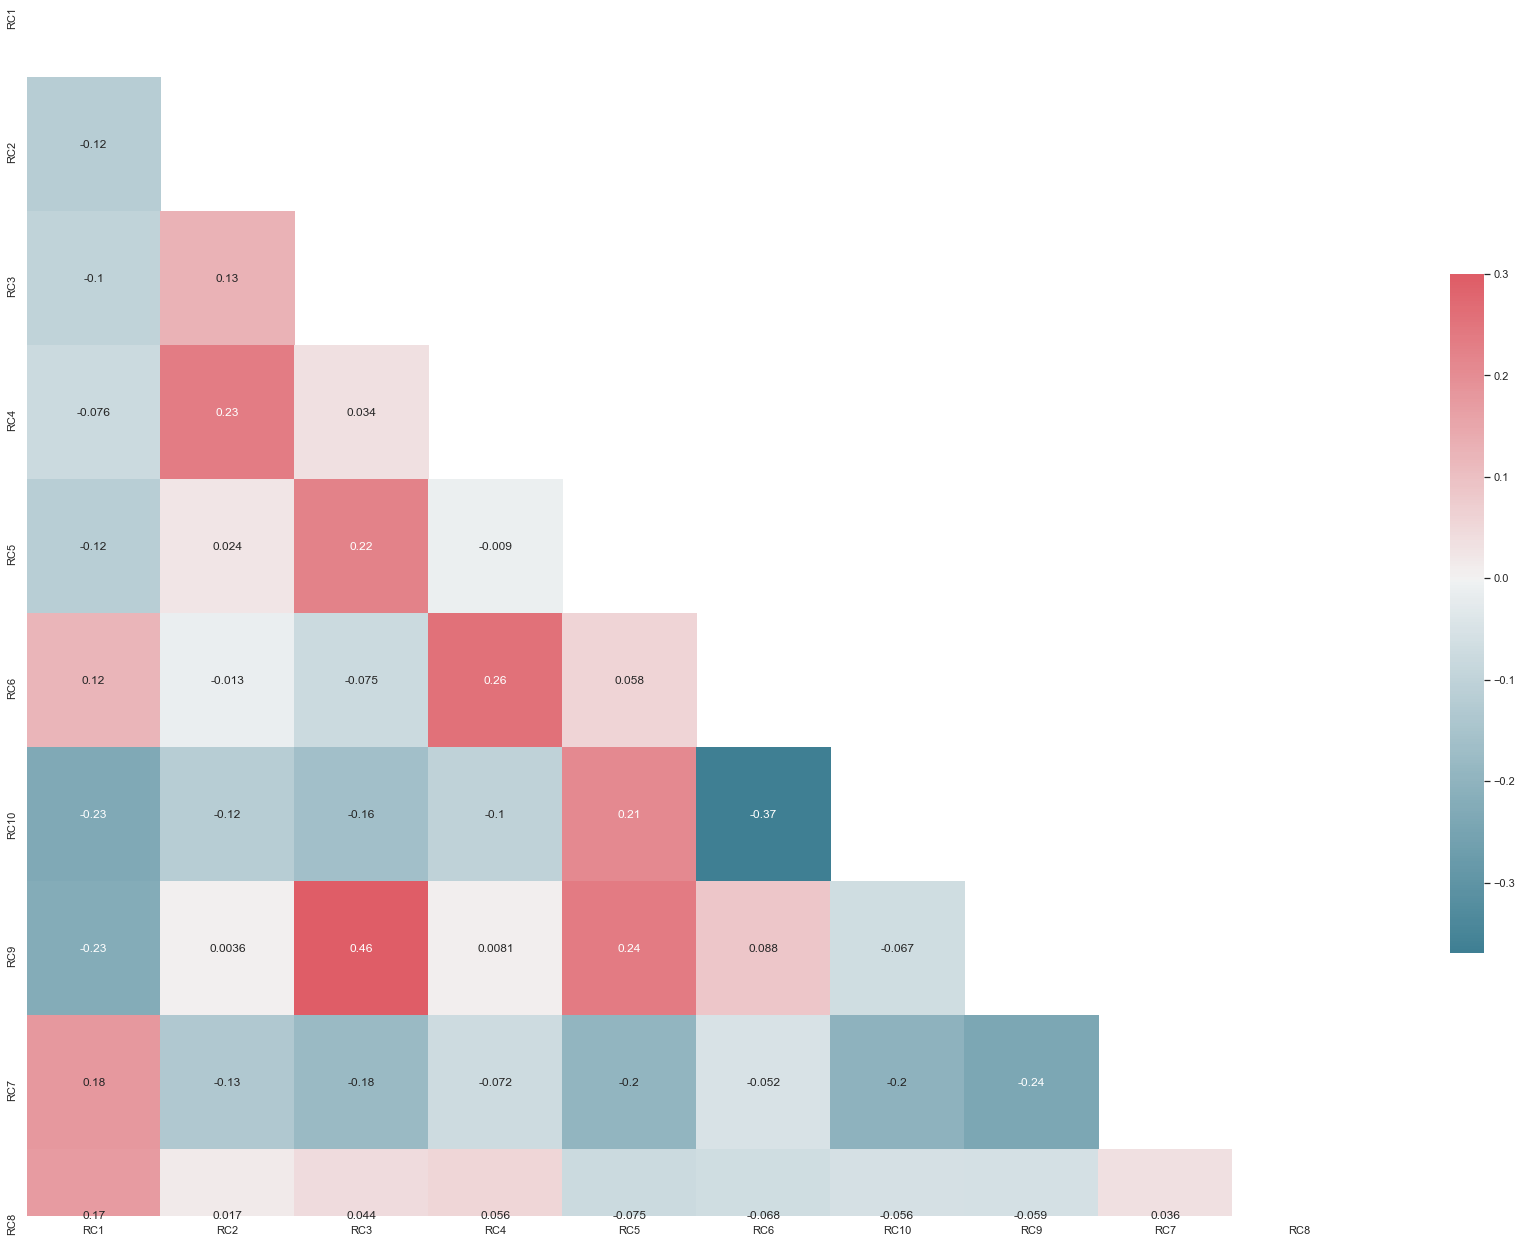

In [10]:
sns.set(style="white")
corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True,  cbar_kws={"shrink": .5});

In [11]:
#scaler = MinMaxScaler()
#X_scl=scaler.fit_transform(X)
scaler = preprocessing.MinMaxScaler().fit(X)
data_scaler = scaler.transform(X)

X_scaled = pd.DataFrame(data=data_scaler,columns=list(X.columns),  index=X.index)
#df.drop(feature_cols, axis=1, inplace=True)
#df = pd.concat([df, df_scaled], axis=1)

In [12]:
X_scaled.head()

,RC1,RC2,RC3,RC4,RC5,RC6,RC10,RC9,RC7,RC8
0,0.153477,0.270510,1.000000,0.196670,0.417281,0.737716,0.000000,0.513608,0.321486,0.605495
1,0.053969,0.070343,0.091159,0.058713,0.047135,0.300079,0.218614,0.202480,0.422663,0.602745
2,0.148108,0.074240,0.063327,0.062125,0.025721,0.522442,0.199966,0.214458,0.400380,0.720389
3,0.010187,1.000000,0.160350,0.194869,0.058923,0.529518,0.156472,0.178945,0.366347,0.691284
4,0.041584,0.057254,0.139059,0.044816,0.108700,0.305652,0.206221,0.344124,0.382422,0.555891


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 24)

In [15]:
X_train.shape

(22, 10)

In [16]:
classifier = RandomForestClassifier(n_estimators = 70, max_depth=50, criterion = "gini", min_samples_split=10,random_state=24)
rfe = RFE(classifier, 5)
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

C:\Users\VIGS2\Anaconda3\envs\Andromeda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['RC4', 'RC6', 'RC9', 'RC7', 'RC8'], dtype='object')

In [17]:
param_grid = [{'n_estimators' : [70,100,150,190],
               'max_depth': [50,60,70,],
               'criterion': ['gini', 'entropy']}]

gs = GridSearchCV(estimator=RandomForestClassifier(min_samples_split=10,random_state=24),
                  param_grid=param_grid,
                  iid=False,
                  refit=True,
                  n_jobs=-1,
                  cv=10)

gs.fit(X_train[X_train.columns[rfe.support_]],y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

C:\Users\VIGS2\Anaconda3\envs\Andromeda\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Best Accuracy: 75.00%
Best Params: {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 70}


C:\Users\VIGS2\Anaconda3\envs\Andromeda\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [18]:
print('Test Accuracy score: %.2f%%' % (gs.best_estimator_.score(X_test[X_test.columns[rfe.support_]], y_test)*100))

Test Accuracy score: 100.00%


Top 5 features are: 
RC5
RC4
RC3
RC1
RC2


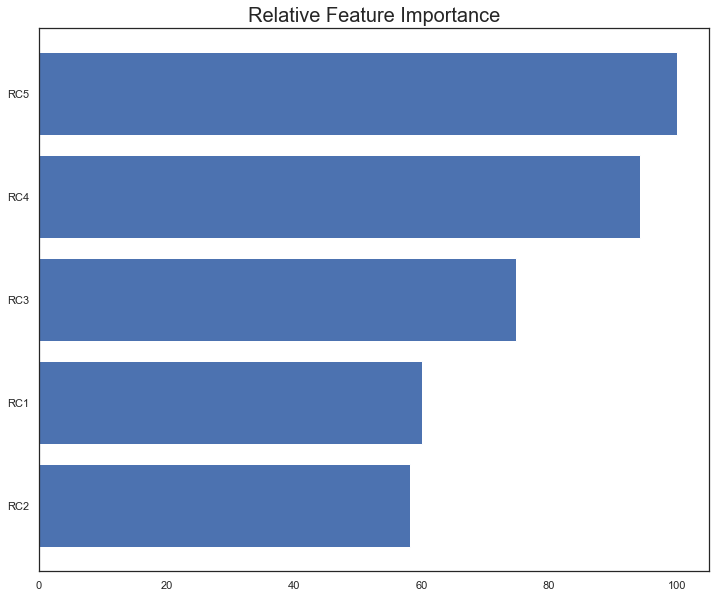

In [20]:
import numpy as np
importances = gs.best_estimator_.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 5 features are: ')
for feature in feature_names_sort[::-1][:5]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()